# Model NLP

In [ ]:
!python -m spacy download es_core_news_sm

2022-11-03 22:50:06.045104: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 5.8 MB/s 


In [ ]:
# Setup
!pip install -q wordcloud

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=6519fd662ed95ed313a1a6e6ffa9210d1accd3b19890e1cef63c6c414b45fb5c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=dac481c41769dffaf28158aa80869cc98096040318d6bae5258226eca70dfff1
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:
!pip install spacy-langdetect
!pip install language-detector
!pip install symspellpy
!pip install sentence-transformers

## Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet

import gensim
from gensim import corpora
from gensim import models
import pyLDAvis.gensim_models


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections impor

In [ ]:
stop_words = stopwords.words('spanish')
# nltk.data.path.append("E:/Python Learning/NLTK All Packages/")
wlt = WordNetLemmatizer()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carga de los datos

In [ ]:
data = pd.read_csv('//content/drive/Shareddrives/TEAM 3 NLP - AI /Reto/ETL/MainDatasetTwitter.csv')


In [ ]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Time,User,Tweet
0,0,0,2022-10-10 16:13:38,TecdeMonterrey,@dzolecito Aquí tienes algunos recursos que ta...
1,1,1,2022-10-10 16:13:19,TecdeMonterrey,"@dzolecito Hola, entendemos que en la vida est..."
2,2,2,2022-10-08 22:02:23,TecdeMonterrey,The #FIL2022 has officially started. This is w...
3,3,3,2022-10-08 20:24:55,TecdeMonterrey,@danielgonsan ¡Felicidades! Sin duda estás dej...
4,4,4,2022-10-07 13:17:25,TecdeMonterrey,@MelyPaezDesign ¡Muchas felicidades!


In [ ]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Time', 'User', 'Tweet'], dtype='object')

In [ ]:
data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [ ]:
data.head()

,Time,User,Tweet
0,2022-10-10 16:13:38,TecdeMonterrey,@dzolecito Aquí tienes algunos recursos que ta...
1,2022-10-10 16:13:19,TecdeMonterrey,"@dzolecito Hola, entendemos que en la vida est..."
2,2022-10-08 22:02:23,TecdeMonterrey,The #FIL2022 has officially started. This is w...
3,2022-10-08 20:24:55,TecdeMonterrey,@danielgonsan ¡Felicidades! Sin duda estás dej...
4,2022-10-07 13:17:25,TecdeMonterrey,@MelyPaezDesign ¡Muchas felicidades!


In [ ]:
data.shape

(27378, 3)

## Preprocesamiento

In [ ]:
def preprocess(CleanText):
    
    CleanText = CleanText.str.replace("(<br/>)", "")
    CleanText = CleanText.str.replace('(<a).*(>).*(</a>)', '')
    CleanText = CleanText.str.replace('(&amp)', '')
    CleanText = CleanText.str.replace('(&gt)', '')
    CleanText = CleanText.str.replace('(&lt)', '')
    CleanText = CleanText.str.replace('(\xa0)', ' ')
    
    return CleanText

In [ ]:
data['Tweet'].head(10)

0    @dzolecito Aquí tienes algunos recursos que ta...
1    @dzolecito Hola, entendemos que en la vida est...
2    The #FIL2022 has officially started. This is w...
3    @danielgonsan ¡Felicidades! Sin duda estás dej...
4                 @MelyPaezDesign ¡Muchas felicidades!
5    @rgbalanix (LCMD‘22) is an @exatec and an #Out...
6    @chicajefa_ También te invitamos a visitar nue...
7    @chicajefa_ Hola, Fernanda. Comprendemos el es...
8    RT @egade: #EGADE reafirma su liderazgo en Lat...
9    @niza_bal Hola Niza, para el Tecnológico de Mo...
Name: Tweet, dtype: object

In [ ]:
data['Tweet'] = preprocess(data['Tweet'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: Fu

In [ ]:
data['Tweet'].head(10)

0    @dzolecito Aquí tienes algunos recursos que ta...
1    @dzolecito Hola, entendemos que en la vida est...
2    The #FIL2022 has officially started. This is w...
3    @danielgonsan ¡Felicidades! Sin duda estás dej...
4                 @MelyPaezDesign ¡Muchas felicidades!
5    @rgbalanix (LCMD‘22) is an @exatec and an #Out...
6    @chicajefa_ También te invitamos a visitar nue...
7    @chicajefa_ Hola, Fernanda. Comprendemos el es...
8    RT @egade: #EGADE reafirma su liderazgo en Lat...
9    @niza_bal Hola Niza, para el Tecnológico de Mo...
Name: Tweet, dtype: object

### Stopwords

In [ ]:
data['Tweet'].head(10)

0    @dzolecito Aquí tienes algunos recursos que ta...
1    @dzolecito Hola, entendemos que en la vida est...
2    The #FIL2022 has officially started. This is w...
3    @danielgonsan ¡Felicidades! Sin duda estás dej...
4                 @MelyPaezDesign ¡Muchas felicidades!
5    @rgbalanix (LCMD‘22) is an @exatec and an #Out...
6    @chicajefa_ También te invitamos a visitar nue...
7    @chicajefa_ Hola, Fernanda. Comprendemos el es...
8    RT @egade: #EGADE reafirma su liderazgo en Lat...
9    @niza_bal Hola Niza, para el Tecnológico de Mo...
Name: Tweet, dtype: object

In [ ]:
stop_words = stopwords.words('spanish')

# Removing stopwords and punctuations from the tweets
data['Tweet'] = data['Tweet'].str.replace('[^\w\s]','')
data['Tweet'] = data['Tweet'].astype(str).apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

<>:4: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \w
<ipython-input-30-a3738d0c9df3>:4: DeprecationWarning: invalid escape sequence \w
  data['Tweet'] = data['Tweet'].str.replace('[^\w\s]','')
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
data['Tweet'].head(10)

0    dzolecito Aquí recursos pueden servirte apoyo ...
1    dzolecito Hola entendemos vida estudiantil pue...
2    The FIL2022 officially started This is where w...
3     danielgonsan Felicidades Sin duda dejando huella
4                    MelyPaezDesign Muchas felicidades
5    rgbalanix LCMD22 is an exatec and an Outlier w...
6    chicajefa_ También invitamos visitar sitio web...
7    chicajefa_ Hola Fernanda Comprendemos estrés c...
8    RT egade EGADE reafirma liderazgo Latinoaméric...
9    niza_bal Hola Niza Tecnológico Monterrey salud...
Name: Tweet, dtype: object

### Corpus

In [ ]:
def preprocess_tweets(customer):
    
    corpus = []
    stem = PorterStemmer()  #
    lem = WordNetLemmatizer() #Raiz
    for tweets in customer['Tweet']:
        words = [w for w in word_tokenize(tweets) if (w not in stop_words)]

        words = [lem.lemmatize(w) for w in words if len(w) > 2]

        corpus.append(words)
    
    return corpus

In [ ]:
corpus = preprocess_tweets(data)

In [ ]:
corpus

[['dzolecito',
  'Aquí',
  'recursos',
  'pueden',
  'servirte',
  'apoyo',
  'httpstco3kTwxgRuSr',
  'Recuerda',
  'sola'],
 ['dzolecito',
  'Hola',
  'entendemos',
  'vida',
  'estudiantil',
  'puede',
  'haber',
  'retos',
  'parecen',
  'superarnos',
  'cuentas',
  'ayudarte',
  'TQueremos',
  'programa',
  'brinda',
  'muchas',
  'cosas',
  'línea',
  'apoyo',
  'horas',
  '800',
  '813',
  '9500',
  '442',
  '295',
  '3004'],
 ['The',
  'FIL2022',
  'officially',
  'started',
  'This',
  'where',
  'celebrate',
  'significant',
  'science',
  'and',
  'education',
  'that',
  'have',
  'impact',
  'the',
  'transformation',
  'our',
  'culture',
  'through',
  'literacy',
  'Enjoy',
  'the',
  'FeriaLibroMty',
  'httpstcodBXEgWXjNO'],
 ['danielgonsan', 'Felicidades', 'Sin', 'duda', 'dejando', 'huella'],
 ['MelyPaezDesign', 'Muchas', 'felicidades'],
 ['rgbalanix',
  'LCMD22',
  'exatec',
  'and',
  'Outlier',
  'with',
  'deep',
  'knowledge',
  'Artificial',
  'Intelligence',
  '

### Bag-of-words

In [ ]:
# Creating bag of words model using gensim
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

## Latent Dirichlet Allocation (LDA)

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus, id2word=dic, num_topics=10, random_state=10,
                                            update_every=1, chunksize=200, passes=5, alpha='auto', eval_every=1,
                                            iterations=100, per_word_topics=True)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.026*"SoyTec" + 0.019*"HiTec" + 0.018*"día" + 0.015*"Querétaro" + 0.013*"Hoy" + 0.013*"Campus" + 0.010*"semestre" + 0.010*"pierdas" + 0.010*"vida" + 0.009*"Ven"
Topic: 1 
Words: 0.015*"soytec" + 0.015*"año" + 0.013*"forma" + 0.013*"próxima" + 0.013*"información" + 0.012*"desarrollo" + 0.010*"ColorRanch" + 0.010*"Hola" + 0.009*"Mercadotecnia" + 0.009*"solo"
Topic: 2 
Words: 0.075*"Tec" + 0.048*"alumnos" + 0.021*"Como" + 0.015*"campus" + 0.015*"equipo" + 0.015*"puedes" + 0.012*"Los" + 0.011*"gran" + 0.010*"Para" + 0.010*"próximo"
Topic: 3 
Words: 0.063*"campusqueretaro" + 0.025*"FactorTec" + 0.019*"Prueba" + 0.018*"Aptitud" + 0.015*"semana" + 0.012*"idea" + 0.010*"momento" + 0.009*"Qué" + 0.009*"Feliz" + 0.008*"días"
Topic: 4 
Words: 0.031*"carrera" + 0.017*"conocer" + 0.013*"Ingeniería" + 0.011*"Regístrate" + 0.011*"Licenciado" + 0.011*"Facebook" + 0.011*"sábado" + 0.010*"Sesión" + 0.010*"toda" + 0.010*"Informativa"
Topic: 5 
Words: 0.036*"TecdeMonterrey" + 0.013*"Acad

### Visualización

In [ ]:
# Visualize the topics
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
pyLDAvis.save_html(vis, 'LDA_Visualization.html')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


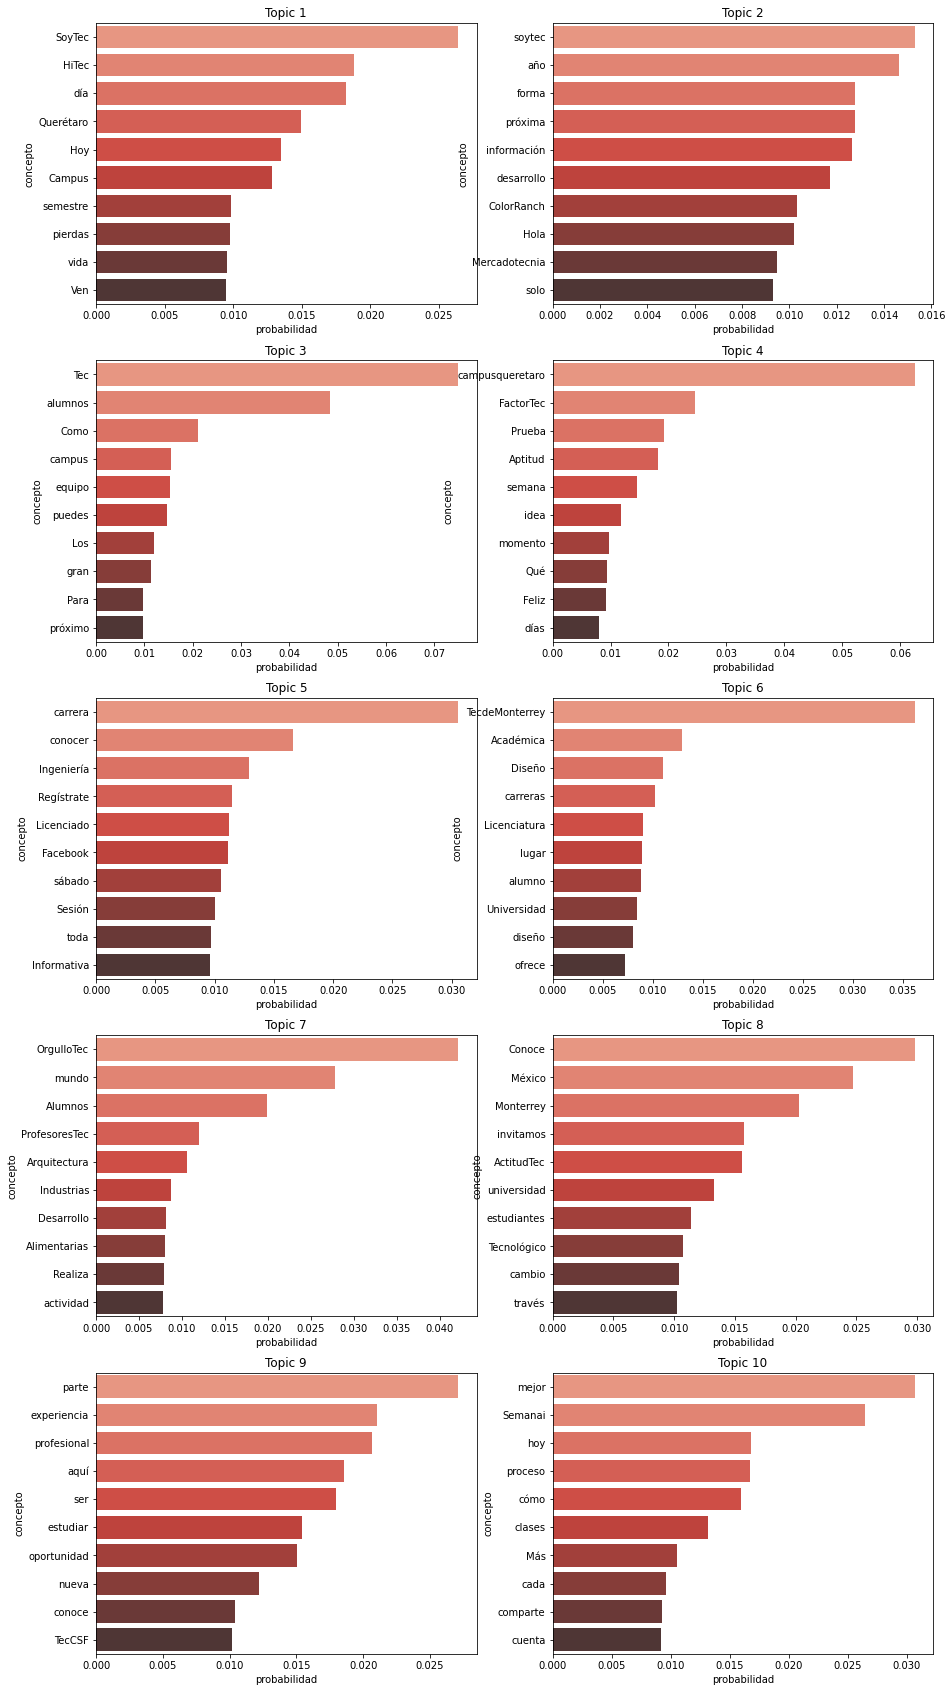

In [ ]:
fiz = plt.figure(figsize=(15, 30))

for i in range(10):
    df = pd.DataFrame(lda_model.show_topic(i), columns=['concepto', 'probabilidad']).set_index('concepto')
    #     df=df.sort_values('prob')
    plt.subplot(5, 2, i + 1)
    plt.title('Topic ' + str(i + 1))
    sns.barplot(x='probabilidad', y=df.index, data=df, label='Tec tweets', palette='Reds_d')
    plt.xlabel('probabilidad')

plt.show()